# Relative_EEG

### Importing libraries

In [1]:
import pandas as pd

from my_defs import (create_datasets, discriminate_target_association,
                     encoding_one_hot, normalize, predict, generate_samples, explore_dataset)

### Dataset exploration

In [2]:
data = pd.read_excel("EEG - Sortie Variables.xlsx", "Relatives")
data

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,25.0,0,0,0,3,1,Travaux_2,1,Manger,161,0,1,0,1,3.05014,1.6497,0.000000,0,5.454692,1,3.103440,1,0,1,1,0,1,1,0,1,1,0,100,121.745250,110.450387,105.049261,105.735398,104.697396,99.753695,102.498241,98.874032,94.159043,98.680507,124.173118,112.280084,105.049261,107.037298,103.782548,97.959184,100.791696,97.044335,91.889514,94.211823,114.303308,105.418719,101.354680,101.460239,101.477833,94.088670,96.674877,93.103448,87.772695,95.408163,118.859958,113.793103,106.122449,107.142857,105.277973,97.026742,103.149191,95.161858,84.764251,105.946517,127.269529,113.687544,108.990148,109.324419,109.218860,105.049261,106.755806,104.398311,101.741731,101.460239,112.948628,99.964814,1.987832
1,01DJ,25.0,0,0,0,5,4,Abs. Marquage,2,Lecture,351,1,1,2,0,2.65012,NaN,0.000000,0,4.167806,1,0.264597,0,0,0,1,0,1,0,0,1,0,1,100,123.038936,116.315290,111.149098,111.851852,110.598291,101.804368,108.224122,99.829060,89.401709,99.145299,125.109212,117.758784,111.320038,112.630579,110.161443,101.405508,107.768281,99.487179,87.122507,95.479582,119.677113,113.751187,107.806268,108.566002,107.369421,97.207977,103.912631,95.156695,83.779677,99.753086,126.096866,118.100665,112.459639,112.668566,112.212726,103.323837,110.332384,101.120608,86.438746,102.431149,124.596391,119.183286,114.131054,115.555556,113.238367,103.038936,110.427350,100.778727,92.668566,101.538462,117.663818,102.905983,2.171721
2,01DJ,25.0,0,0,0,6,5,Météo,3,Conversation,224,0,0,0,0,8.00000,NaN,0.000000,0,2.861475,1,0.065688,0,0,0,1,0,1,0,0,1,0,1,100,118.744362,112.015154,106.927657,107.541043,106.476637,100.018041,103.283421,98.971676,93.397077,98.628901,121.973660,114.811474,107.649287,108.930182,106.566841,98.502616,102.489627,97.293884,90.239942,94.263034,116.417103,108.497204,103.030850,104.221541,102.381382,93.415118,97.221721,92.134223,87.028685,96.788743,120.349991,116.362980,109.633772,111.942991,108.551326,97.889230,104.474111,95.832582,85.405015,106.224066,121.432437,113.476457,110.283240,110.626015,110.084792,105.520476,106.945697,104.997294,102.399423,101.984485,115.118167,101.154609,2.053115
3,01DJ,25.0,0,0,0,1,1,Travaux_1,4,Jeu vidéo,128,0,0,1,1,2.00009,1.2935,0.000000,0,5.495789,1,3.184360,1,0,1,0,0,1,1,0,0,0,0,100,660.500000,626.800000,596.400000,601.400000,592.400000,556.500000,575.200000,550.600000,511.800000,546.200000,674.800000,636.600000,600.200000,608.100000,593.700000,548.600000,571.600000,541.600000,4

In [3]:
explore_dataset(data)

DESCRIPTION


,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,ID NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,356.000000,357.000000,356.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,43.190476,0.733894,0.490196,0.476190,3.462185,2.658263,3.487395,411.921569,0.812325,0.336134,0.675070,0.616246,2.868189,16.953112,0.364146,9.131148,0.759104,2.103643,0.675070,0.075630,0.624650,0.789916,0.336134,0.717087,0.591036,0.288515,0.619048,0.487395,0.291317,100.0,127.877932,116.934234,111.303121,113.173732,414.797067,101.476187,105.593240,100.235688,91.525044,94.894332,125.249751,113.990975,105.374937,108.137866,103.537991,94.830539,98.786601,93.697529,83.864883,89.963593,116.093291,106.686440,100.940227,102.750374,99.856081,91.015610,94.626594,89.784044,79.329674,96.879027,484.137461,114.587921,109.695051,111.619086,108.623454,97.752556,103.156938,96.034118,85.307928,106.962495,134.414131,123.985519,116.559072,118.986374,114.974952,106.465304,110.970074,105.054305,97.884757,125.893901,117.284329,100.796586,3.169686
std,16.741806,0.827409,0.500605,0.500134,1.706514,1.489955,1.705241,322.424923,0.801028,0.473049,0.750109,0.486982,1.498398,29.055883,0.481865,10.551726,0.428228,1.391294,0.469006,0.264777,0.484893,0.407940,0.473049,0.451047,0.492333,0.453708,0.486302,0.500543,0.455007,0.0,29.476391,27.768541,26.535624,26.854184,5756.304603,24.426006,25.309230,24.324785,23.127724,26.374289,32.497621,30.894386,29.455826,29.903830,29.293646,26.615770,28.142454,26.280225,24.884725,23.857765,29.413808,28.942196,26.747954,27.218906,26.667350,24.215448,25.327102,23.862077,22.633388,24.424500,6781.763811,29.006219,28.022291,28.580855,27.843629,25.133708,26.914489,24.818201,22.379911,30.02

****************************************************************************************************
INFORMATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 87 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Sujet                                                       357 non-null    object 
 1   Age                                                         357 non-null    float64
 2   Age category                                                357 non-null    int64  
 3   Gender                                                      357 non-null    int64  
 4   Scenario                                                    357 non-null    int64  
 5   ID scenario Event                                           357 non-null    int64  
 6   ID Event                                                    357 

None

****************************************************************************************************
PRESENCE OF NULL VALUE(S)?


Sujet                                                             0
Age                                                               0
Age category                                                      0
Gender                                                            0
Scenario                                                          0
ID scenario Event                                                 0
ID Event                                                          0
Event                                                             0
ID NDRT                                                           0
NDRT                                                              0
NDRT duration (s)                                                 0
NDRT duration                                                     0
NDRT solicitation hands                                           0
NDRT solicitation gaze                                            0
Lane changing                                   

****************************************************************************************************
PRESENCE OF DUPLICATED SAMPLE(S)?


0

****************************************************************************************************


### Data Processing (data cleaning and restructuring)

In [4]:
df = data.copy()

>**We can see that the variables that we can judge as categorical are not all in the 'object' format, which could cause us problems later.**
>
> **To start, we will convert the categorical variables to 'object'**

In [5]:
var_to_object = ['Gender',
                 'ID Event',
                 'ID NDRT',
                 'NDRT duration (s)',
                 'NDRT solicitation hands',
                 'NDRT solicitation gaze',
                 'Lane changing']

In [6]:
df[var_to_object]= df[var_to_object].astype('object')

> **We are going to normalize the continuous variables**

In [7]:
df_normalized = normalize(df, normalization_type='minmax')
df_normalized

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,0.028571,0.0,0,0.0,0.4,1,Travaux_2,1,Manger,161,0.0,1,0,1,0.282625,1.6497,0.000000,0.0,0.035965,1.0,0.626606,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.051491,0.042549,0.032215,0.036942,0.000182,0.053165,0.036730,0.079188,0.091750,0.057169,0.085722,0.046459,0.051211,0.052480,0.061752,0.060811,0.056208,0.062183,0.074463,0.051574,0.043075,0.154208,0.049007,0.045066,0.057991,0.051096,0.046870,0.053942,0.112516,0.034696,0.000161,0.060751,0.037770,0.046828,0.040693,0.039094,0.161701,0.040501,0.045911,0.280877,0.162045,0.239765,0.257567,0.250887,0.262628,0.284864,0.271943,0.288707,0.310155,0.002324,0.067157,0.042598,0.065315
1,01DJ,0.028571,0.0,0,0.0,0.8,4,Abs. Marquage,2,Lecture,351,0.5,1,2,0,0.224651,NaN,0.000000,0.0,0.027208,1.0,0.046067,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.053768,0.053424,0.044230,0.048826,0.000237,0.057416,0.048398,0.081134,0.081404,0.058148,0.087276,0.056423,0.063227,0.063057,0.073969,0.067993,0.070194,0.067336,0.063554,0.054374,0.052829,0.168055,0.061911,0.059172,0.069746,0.057949,0.062064,0.058513,0.103374,0.044229,0.000217,0.068606,0.050097,0.057332,0.054289,0.052542,0.174454,0.053409,0.050009,0.275593,0.157991,0.247515,0.265090,0.259933,0.268539,0.281848,0.277403,0.283262,0.296284,0.002333,0.075578,0.048811,0.083414
2,01DJ,0.028571,0.0,0,0.0,1.0,5,Météo,3,Conversation,224,0.0,0,0,0,1.000000,NaN,0.000000,0.0,0.018318,1.0,0.005390,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.046208,0.045450,0.035915,0.040451,0.000199,0.053713,0.038330,0.079387,0.090093,0.057060,0.082070,0.051063,0.056193,0.056059,0.067085,0.061943,0.059612,0.062709,0.070688,0.051687,0.046912,0.159324,0.052359,0.050547,0.059793,0.049617,0.048018,0.051785,0.110813,0.037725,0.000172,0.065437,0.044600,0.055952,0.047111,0.040936,0.164053,0.041954,0.047479,0.281295,0.153192,0.239467,0.259459,0.252776,0.263901,0.285571,0.272225,0.289609,0.311160,0.002384,0.071032,0.045111,0.071740
3,01DJ,0.028571,0.0,0,0.0,0.0,1,Travaux_1,4,Jeu vidéo,128,0.0,0,1,1,0.130443,1.2935,0.000000,0.0,0.036245,1.0,0.643154,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.004666,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.004398,1.000000,1.000000,1.000000,1.000

### Dataset creation

>**We will start by separating the features from the targets**

In [8]:
X_lane, y_lane, X_no_lane, y_no_lane, X_TOT, y_TOT = create_datasets(df_normalized, only_physio_datas=False)

### Reduction of dimensions according to the link of each figure with the targets.

**The objective here will be to measure the association of each feature with each target to exclude variables that have no impact with the targets.**

In [9]:
X_lane_reduced, lane_pvalues = discriminate_target_association(X_lane,y_lane)

In [10]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.029,0.174,0.063,0.03,0.023,0.393,0.269,NaN,0.667,0.712,0.712,0.727,0.699,0.634,0.637,0.567,0.343,0.3,0.312,0.29,0.237,0.245,0.239,0.25,0.218,0.263,0.199,0.269,0.411,0.274,0.356,0.391,0.326,0.295,0.306,0.293,0.191,0.992,0.924,0.911,0.894,0.864,0.873,0.917,0.985,0.9,0.873,0.241,0.525,0.418,0.386,0.412,0.375,0.249,0.319,0.229,0.16,0.506,0.256,0.285,0.585,0.029,0.174,0.063,0.03,0.023,0.393,0.269,NaN,0.667,0.712,0.712,0.727,0.699,0.634,0.637,0.567,0.343,0.3,0.312,0.29,0.237,0.245,0.239,0.25,0.218,0.263,0.199,0.269,0.411,0.274,0.356,0.391,0.326,0.295,0.306,0.293,0.191,0.992,0.924,0.911,0.894,0.864,0.873,0.917,0.985,0.9,0.873,0.241,0.525,0.418,0.386,0.412,0.375,0.249,0.319,0.229,0.16,0.506,0.256,0.285,0.585
TOQ (Coll a/o(TTC<1s & steering),0.009,0.782,0.036,0.604,0.001,0.884,0.824,NaN,0.419,0.459,0.436,0.471,0.402,0.292,0.284,0.207,0.285,0.202,0.214,0.272,0.2,0.216,0.238,0.145,0.159,0.141,0.158,0.141,0.278,0.383,0.27,0.268,0.261,0.129,0.155,0.121,0.084,0.461,0.605,0.751,0.71,0.871,0.63,0.442,0.494,0.42,0.359,0.375,0.449,0.515,0.565,0.606,0.533,0.368,0.454,0.343,0.305,0.352,0.091,0.07,0.769,0.009,0.782,0.036,0.604,0.001,0.884,0.824,NaN,0.419,0.459,0.436,0.471,0.402,0.292,0.284,0.207,0.285,0.202,0.214,0.272,0.2,0.216,0.238,0.145,0.159,0.141,0.158,0.141

In [11]:
for key, value in X_lane_reduced.items():
    print(f"{key}: {value.shape}")

TOQ (Coll a/o(TTC<1s & braking): (220, 4)
TOQ (Coll a/o(TTC<1s & steering): (220, 4)
TOQ (Coll a/o(TTC<1s & mirror): (220, 3)


### TAKE-OVER WITH LANE CHANGING

In [12]:
X_lane_encoded = encoding_one_hot(X_lane_reduced)
list(X_lane_encoded.values())[0]

,Age,TOTAL BAND 1-50Hz,ID NDRT_1,ID NDRT_2,ID NDRT_3,ID NDRT_4,ID NDRT_5,ID NDRT_6,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872
0,0.028571,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.028571,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0.028571,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,0.028571,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6,0.028571,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.922449,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
349,0.922449,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
351,0.922449,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
352,0.922449,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.029,0.174,0.063,0.03,0.023,0.393,0.269,NaN,0.667,0.712,0.712,0.727,0.699,0.634,0.637,0.567,0.343,0.3,0.312,0.29,0.237,0.245,0.239,0.25,0.218,0.263,0.199,0.269,0.411,0.274,0.356,0.391,0.326,0.295,0.306,0.293,0.191,0.992,0.924,0.911,0.894,0.864,0.873,0.917,0.985,0.9,0.873,0.241,0.525,0.418,0.386,0.412,0.375,0.249,0.319,0.229,0.16,0.506,0.256,0.285,0.585,0.029,0.174,0.063,0.03,0.023,0.393,0.269,NaN,0.667,0.712,0.712,0.727,0.699,0.634,0.637,0.567,0.343,0.3,0.312,0.29,0.237,0.245,0.239,0.25,0.218,0.263,0.199,0.269,0.411,0.274,0.356,0.391,0.326,0.295,0.306,0.293,0.191,0.992,0.924,0.911,0.894,0.864,0.873,0.917,0.985,0.9,0.873,0.241,0.525,0.418,0.386,0.412,0.375,0.249,0.319,0.229,0.16,0.506,0.256,0.285,0.585
TOQ (Coll a/o(TTC<1s & steering),0.009,0.782,0.036,0.604,0.001,0.884,0.824,NaN,0.419,0.459,0.436,0.471,0.402,0.292,0.284,0.207,0.285,0.202,0.214,0.272,0.2,0.216,0.238,0.145,0.159,0.141,0.158,0.141,0.278,0.383,0.27,0.268,0.261,0.129,0.155,0.121,0.084,0.461,0.605,0.751,0.71,0.871,0.63,0.442,0.494,0.42,0.359,0.375,0.449,0.515,0.565,0.606,0.533,0.368,0.454,0.343,0.305,0.352,0.091,0.07,0.769,0.009,0.782,0.036,0.604,0.001,0.884,0.824,NaN,0.419,0.459,0.436,0.471,0.402,0.292,0.284,0.207,0.285,0.202,0.214,0.272,0.2,0.216,0.238,0.145,0.159,0.141,0.158,0.141

In [14]:
for key in y_lane:
    display(pd.DataFrame(lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o(TTC<1s & braking)
NDRT duration (s),0.023
NDRT duration (s),0.023
Age,0.029
Age,0.029
ID NDRT,0.03
ID NDRT,0.03
ID Event,0.063
ID Event,0.063
Oz GAMMA 30-50Hz,0.16
Oz GAMMA 30-50Hz,0.16


,TOQ (Coll a/o(TTC<1s & steering)
NDRT duration (s),0.001
NDRT duration (s),0.001
Age,0.009
Age,0.009
ID Event,0.036
ID Event,0.036
FRONTAL BETA,0.07
FRONTAL BETA,0.07
Cz GAMMA 30-50Hz,0.084
Cz GAMMA 30-50Hz,0.084


,TOQ (Coll a/o(TTC<1s & mirror)
NDRT duration (s),0.001
NDRT duration (s),0.001
Age,0.005
Age,0.005
ID Event,0.073
ID Event,0.073
Gender,0.124
Gender,0.124
FRONTAL BETA,0.134
FRONTAL BETA,0.134


TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,27,7
1.0,6,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81        34
         1.0       0.36      0.40      0.38        10

    accuracy                           0.70        44
   macro avg       0.59      0.60      0.59        44
weighted avg       0.71      0.70      0.71        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,29,5
1.0,8,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82        34
         1.0       0.29      0.20      0.24        10

    accuracy                           0.70        44
   macro avg       0.53      0.53      0.53        44
weighted avg       0.67      0.70      0.68        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,27,7
1.0,8,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78        34
         1.0       0.22      0.20      0.21        10

    accuracy                           0.66        44
   macro avg       0.50      0.50      0.50        44
weighted avg       0.65      0.66      0.65        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,32,2
1.0,10,0


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84        34
         1.0       0.00      0.00      0.00        10

    accuracy                           0.73        44
   macro avg       0.38      0.47      0.42        44
weighted avg       0.59      0.73      0.65        44

************************************



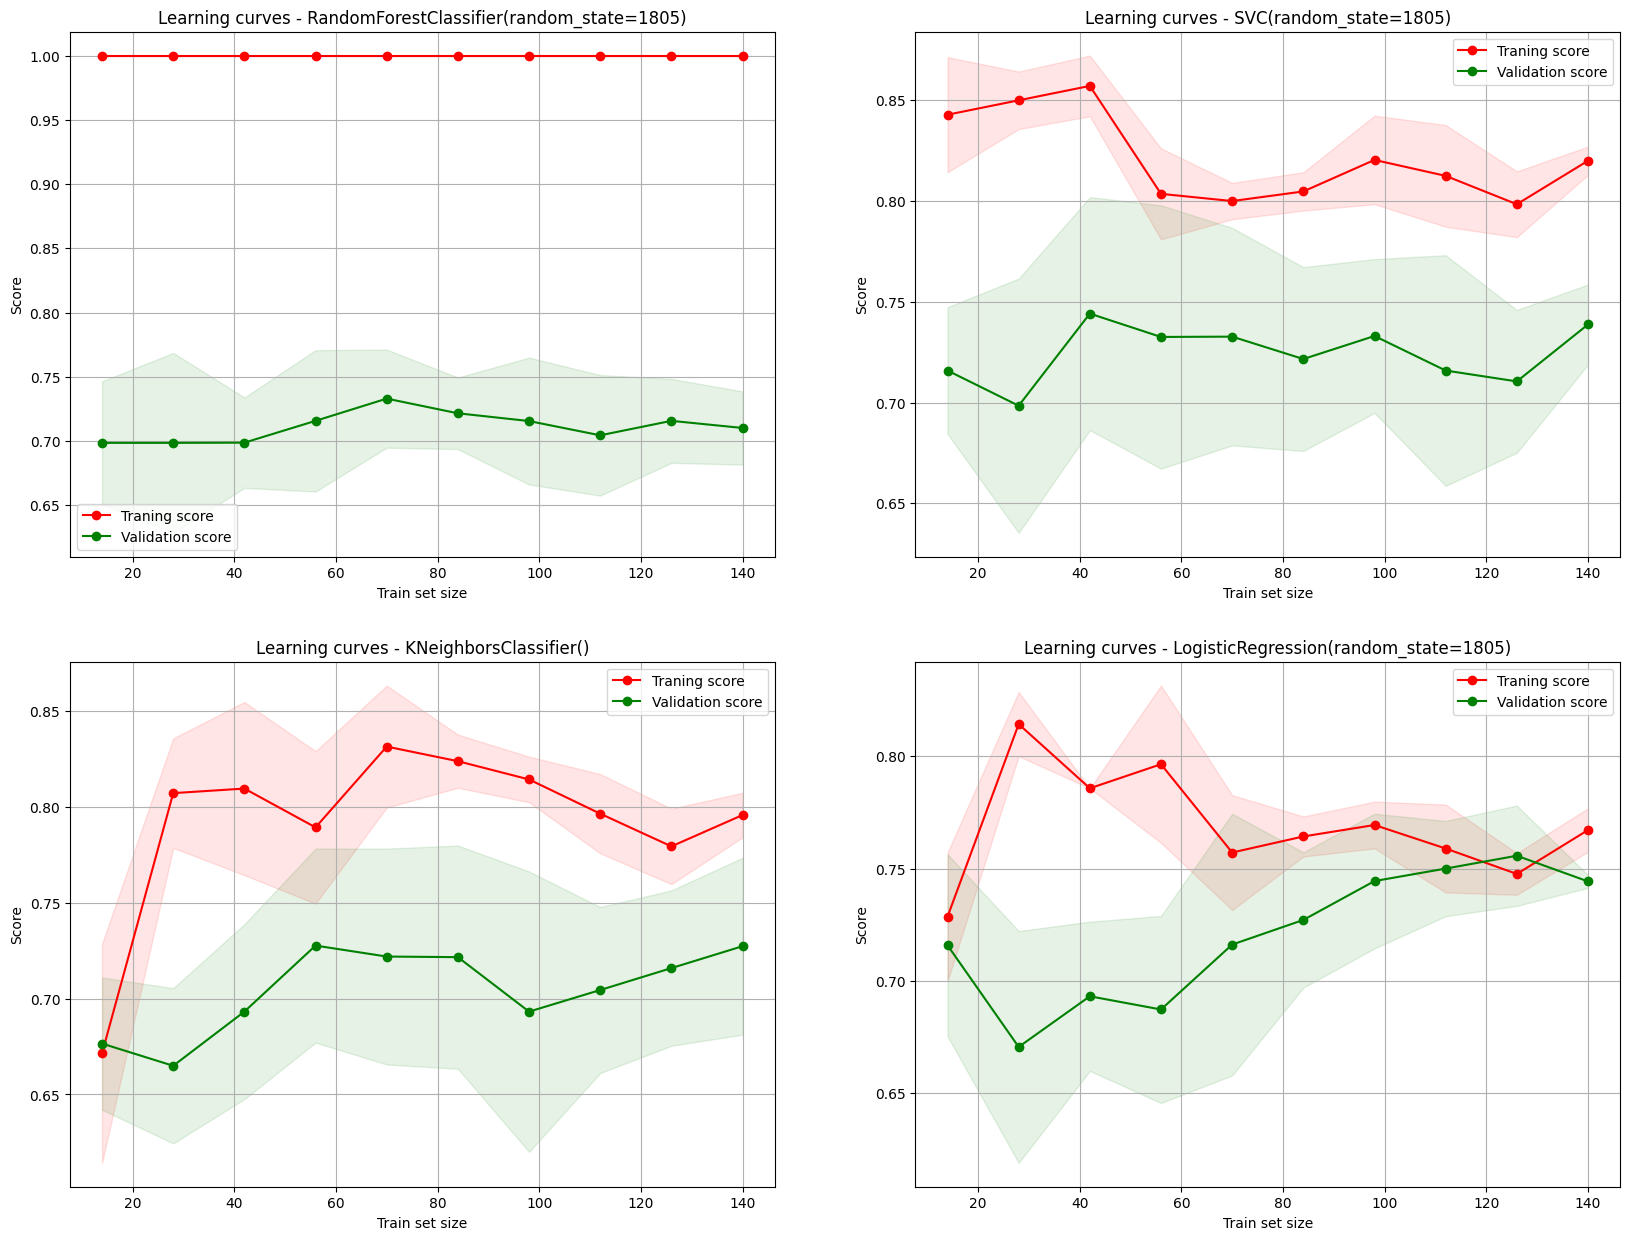

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",0.97,0.70,0.38,-0.09,Overfitting :0.28,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.84,0.70,0.24,-0.18,Overfitting :0.17,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.85,0.66,0.21,-0.24,Overfitting :0.22,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.76,0.73,0.00,-0.27,Overfitting :0.04,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,16,7
1.0,11,10


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64        23
         1.0       0.59      0.48      0.53        21

    accuracy                           0.59        44
   macro avg       0.59      0.59      0.58        44
weighted avg       0.59      0.59      0.59        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,15,8
1.0,8,13


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65        23
         1.0       0.62      0.62      0.62        21

    accuracy                           0.64        44
   macro avg       0.64      0.64      0.64        44
weighted avg       0.64      0.64      0.64        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,17,6
1.0,10,11


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68        23
         1.0       0.65      0.52      0.58        21

    accuracy                           0.64        44
   macro avg       0.64      0.63      0.63        44
weighted avg       0.64      0.64      0.63        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,15,8
1.0,5,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70        23
         1.0       0.67      0.76      0.71        21

    accuracy                           0.70        44
   macro avg       0.71      0.71      0.70        44
weighted avg       0.71      0.70      0.70        44

************************************



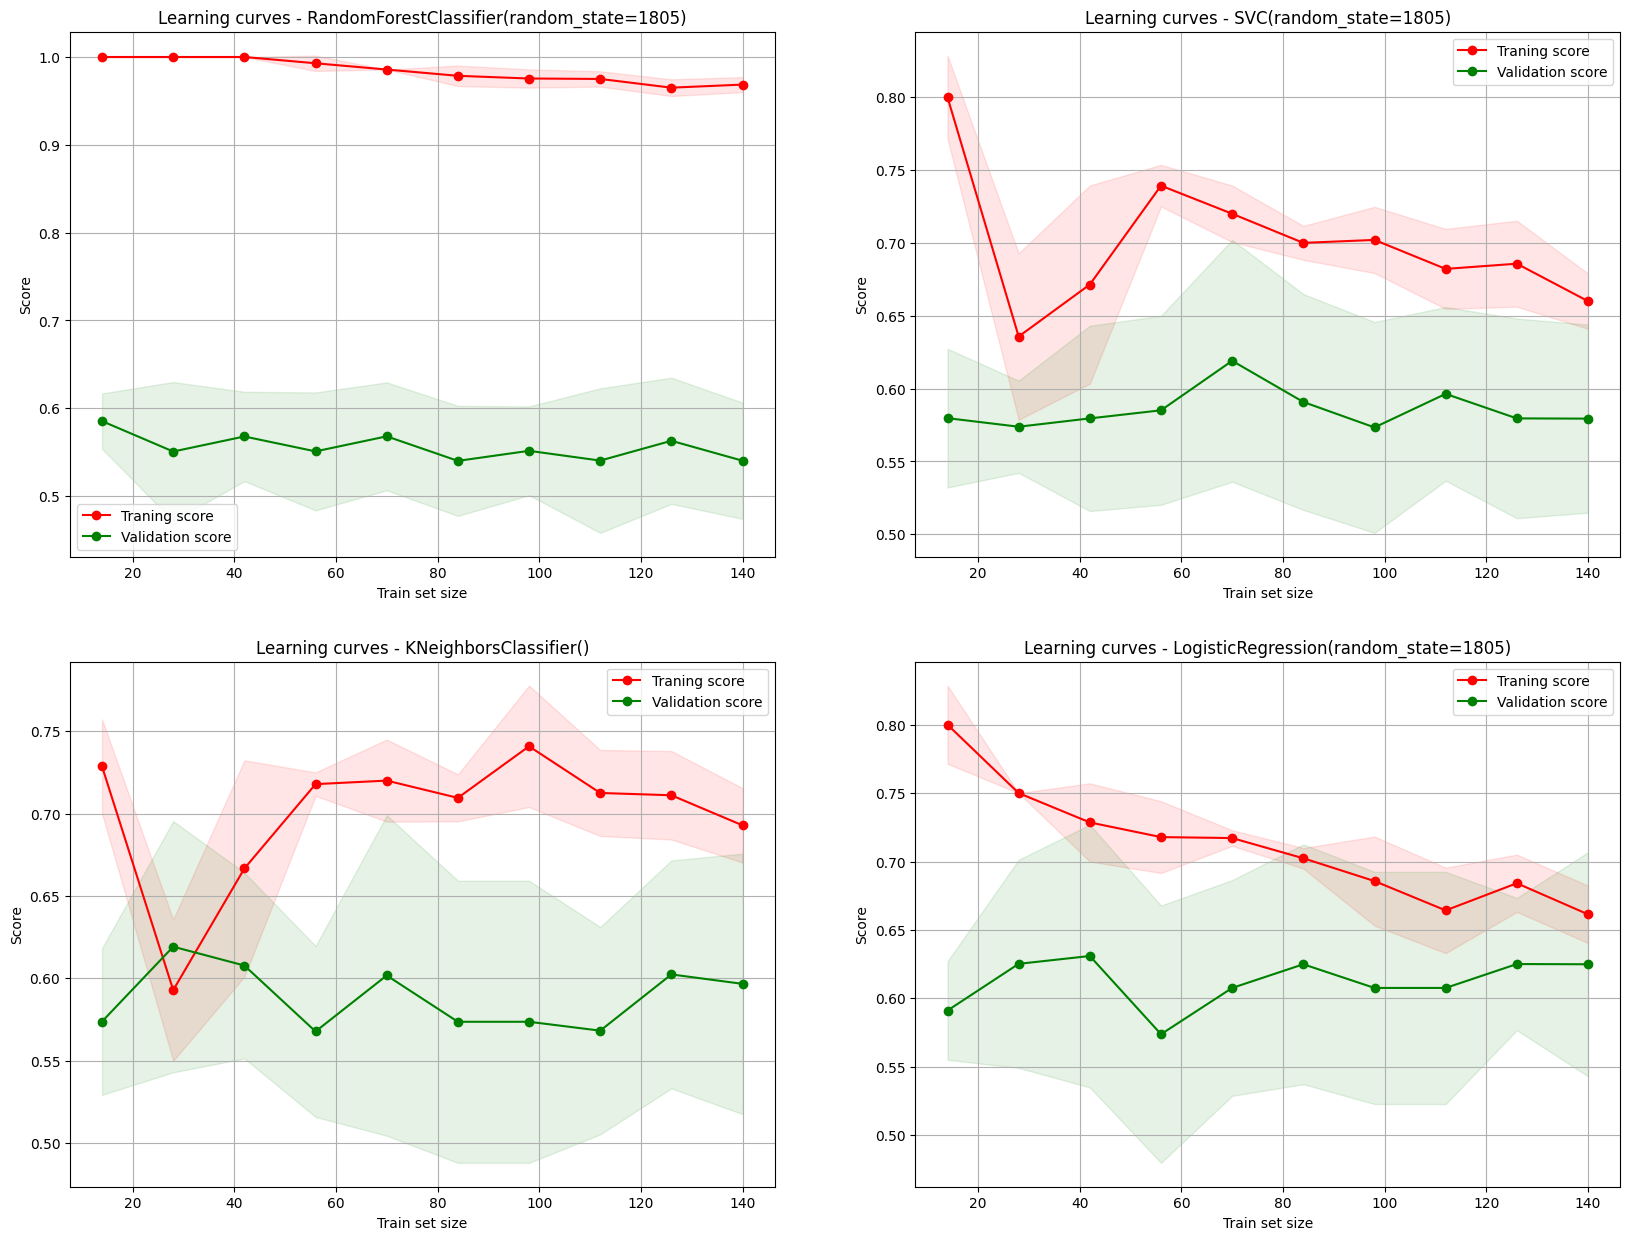

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.76,0.59,0.53,-0.17,Overfitting :0.22,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 1, 'gamma': 10, 'kernel': 'poly'}",0.67,0.64,0.62,-0.07,Overfitting :0.04,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.65,0.64,0.58,-0.08,Overfitting :0.02,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.66,0.70,0.71,0.09,Underfitting :-0.06,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,13
1.0,3,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.48      0.60        25
         1.0       0.55      0.84      0.67        19

    accuracy                           0.64        44
   macro avg       0.68      0.66      0.63        44
weighted avg       0.69      0.64      0.63        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,17
1.0,1,18


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.32      0.47        25
         1.0       0.51      0.95      0.67        19

    accuracy                           0.59        44
   macro avg       0.70      0.63      0.57        44
weighted avg       0.73      0.59      0.56        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,13
1.0,4,15


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.48      0.59        25
         1.0       0.54      0.79      0.64        19

    accuracy                           0.61        44
   macro avg       0.64      0.63      0.61        44
weighted avg       0.66      0.61      0.61        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,9,16
1.0,2,17


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.36      0.50        25
         1.0       0.52      0.89      0.65        19

    accuracy                           0.59        44
   macro avg       0.67      0.63      0.58        44
weighted avg       0.69      0.59      0.57        44

************************************



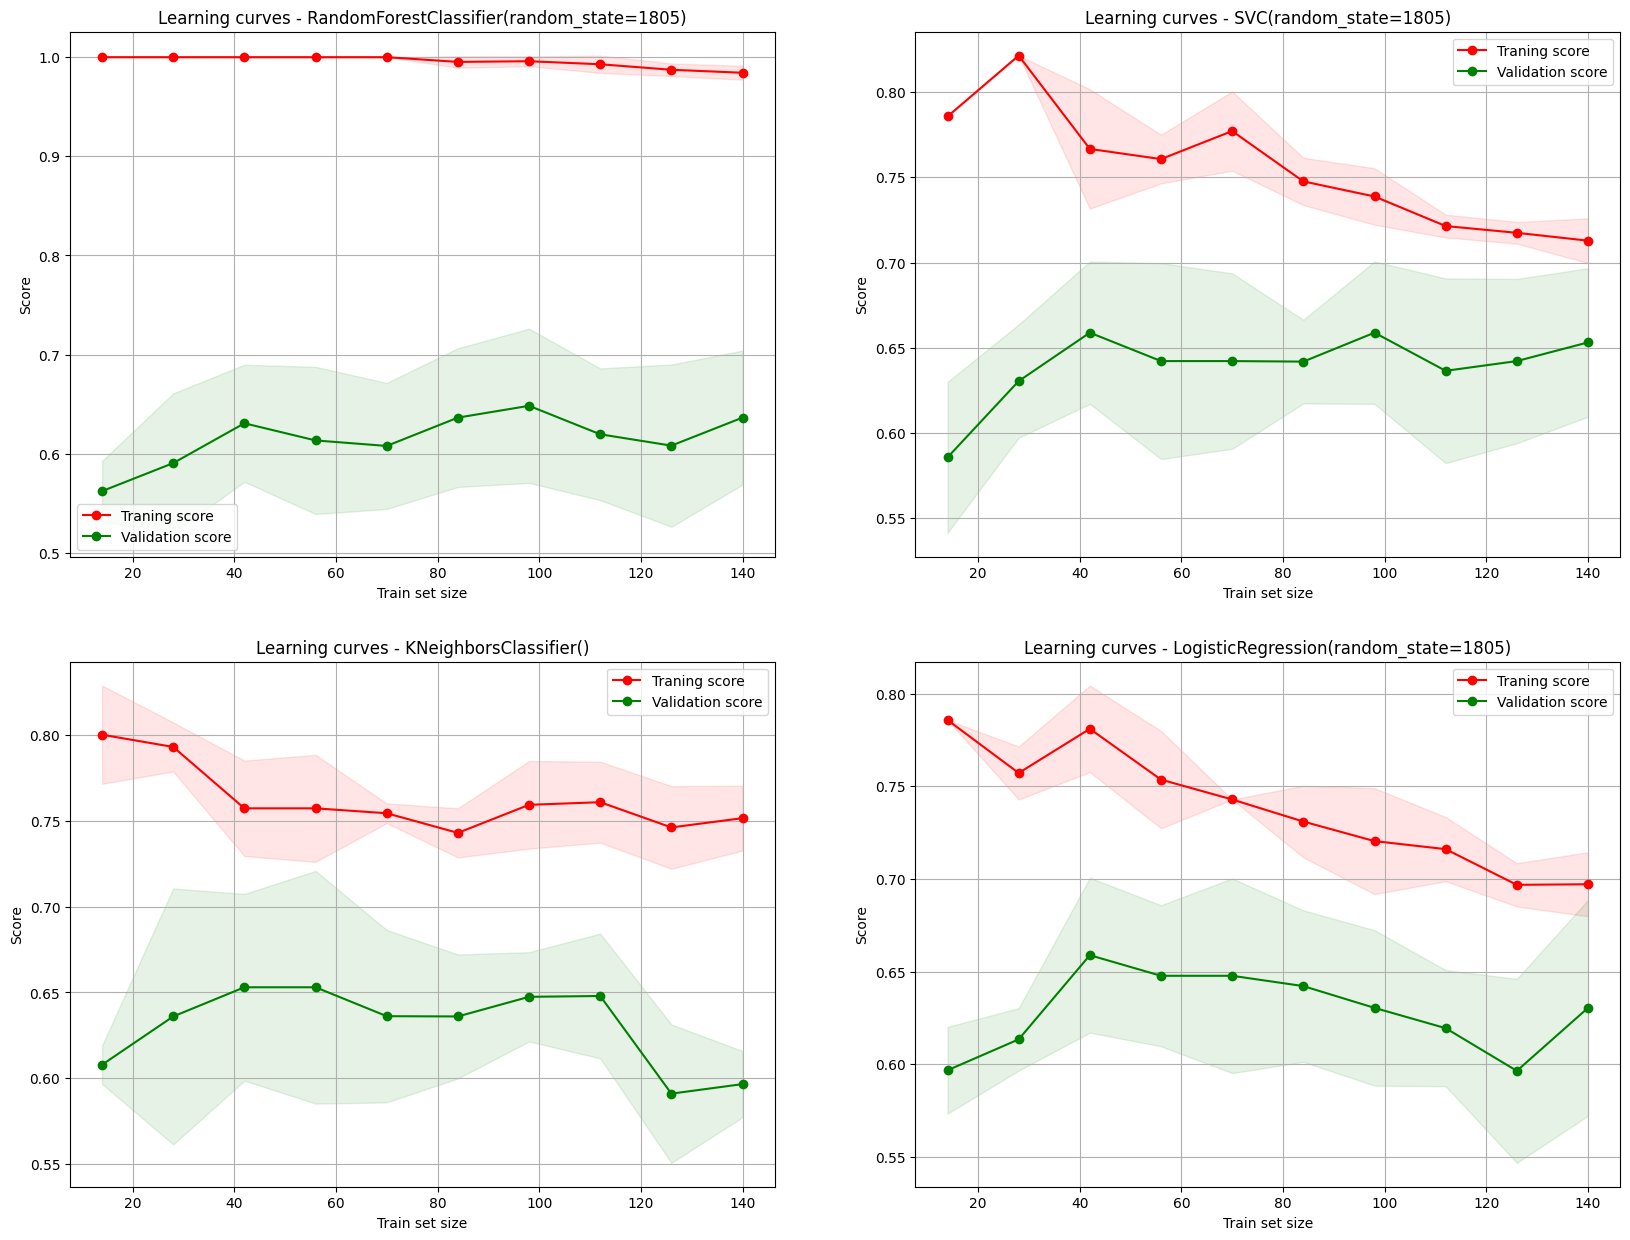

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.81,0.64,0.67,-0.07,Overfitting :0.21,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.67,0.59,0.67,-0.19,Overfitting :0.12,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.69,0.61,0.64,-0.12,Overfitting :0.12,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.68,0.59,0.65,-0.18,Overfitting :0.13,too much complex


In [15]:
predict(X_lane_encoded,y_lane, method = 'classification')

### Resampling dataset (create new samples)

In [16]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_encoded,y_lane,n_samples_created=500)

In [17]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_resampled,y_lane_resampled, _sampling_strategy='auto')

TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,73,13
1.0,13,101


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        86
         1.0       0.89      0.89      0.89       114

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,67,19
1.0,9,105


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83        86
         1.0       0.85      0.92      0.88       114

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,69,17
1.0,11,103


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        86
         1.0       0.86      0.90      0.88       114

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.86       200
weighted avg       0.86      0.86      0.86       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,66,20
1.0,21,93


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76        86
         1.0       0.82      0.82      0.82       114

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200

************************************



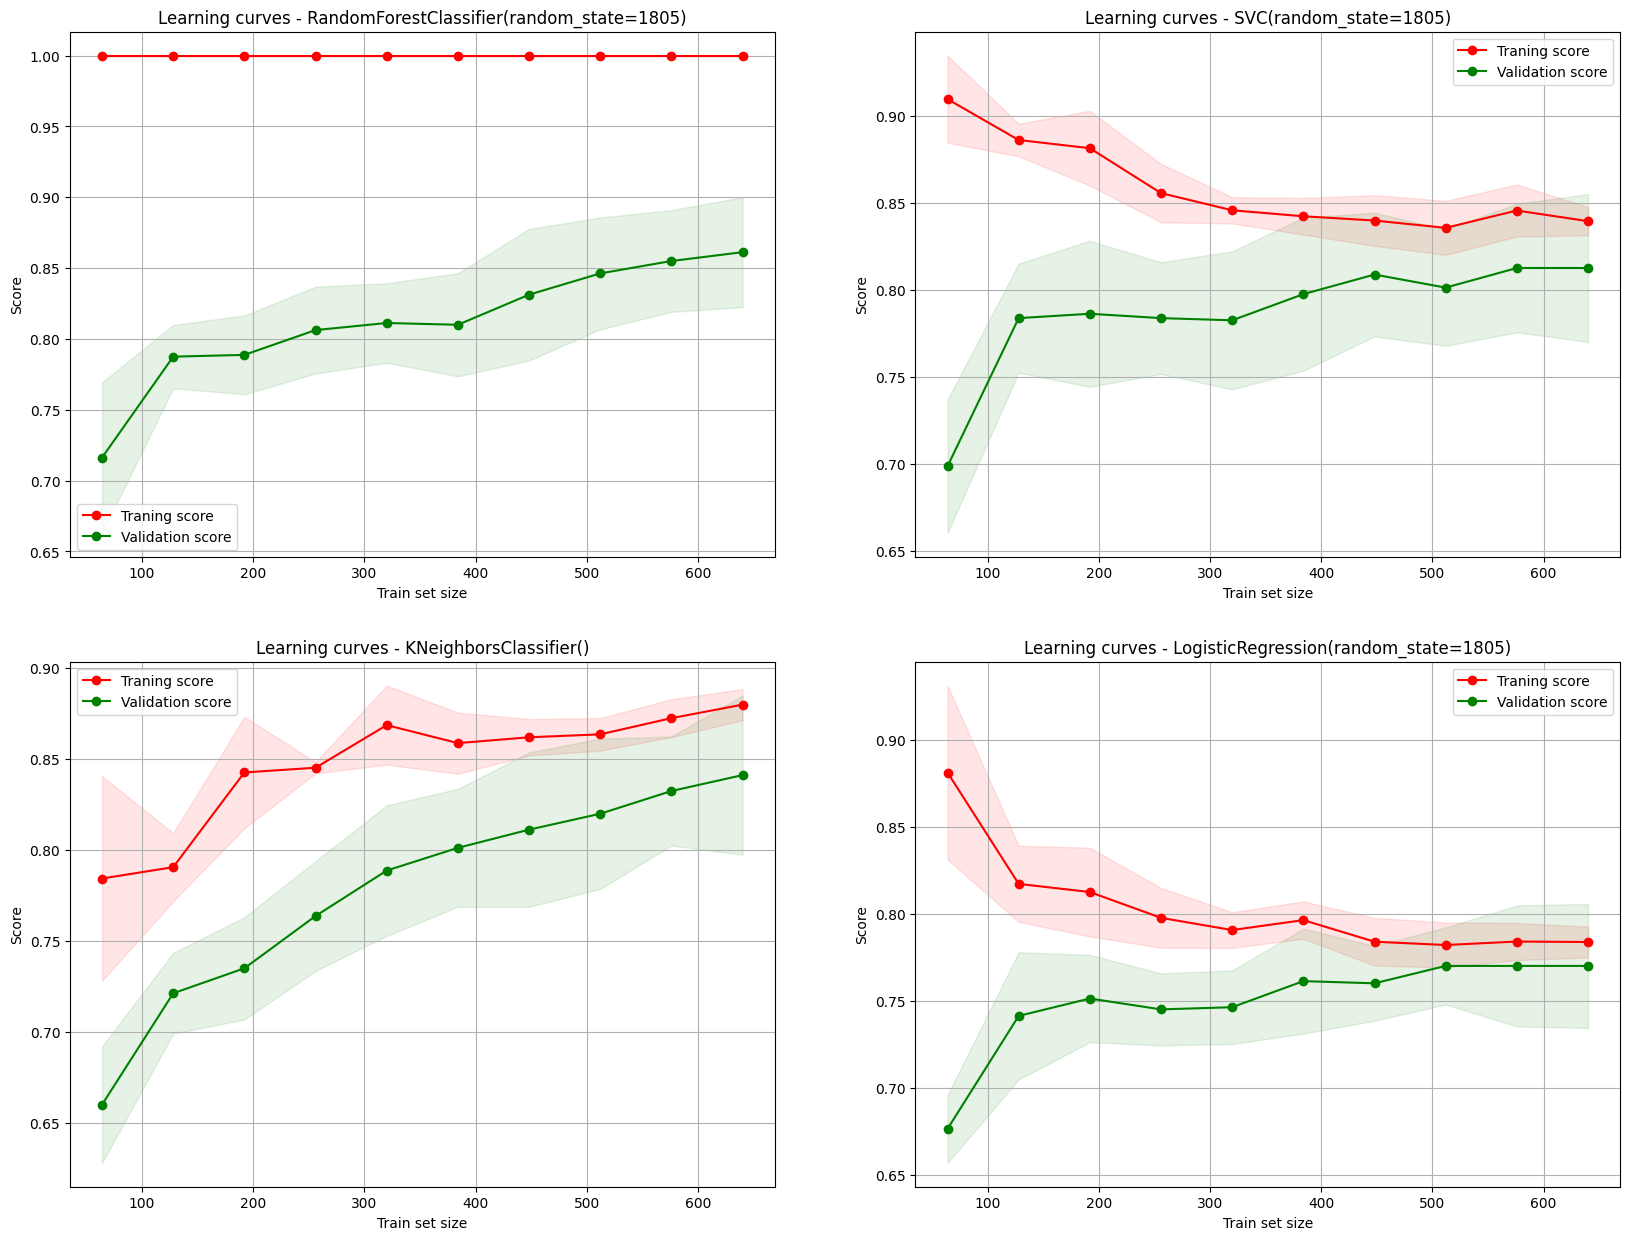

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",0.99,0.87,0.89,0.53,Overfitting :0.12,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.92,0.86,0.88,0.49,Overfitting :0.07,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'distan...",1.00,0.86,0.88,0.50,Overfitting :0.14,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.80,0.80,0.82,0.31,Overfitting :0.0,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,68,18
1.0,26,88


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.76        86
         1.0       0.83      0.77      0.80       114

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,66,20
1.0,34,80


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.66      0.77      0.71        86
         1.0       0.80      0.70      0.75       114

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,69,17
1.0,33,81


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.73        86
         1.0       0.83      0.71      0.76       114

    accuracy                           0.75       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.76      0.75      0.75       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,64,22
1.0,34,80


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.65      0.74      0.70        86
         1.0       0.78      0.70      0.74       114

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200

************************************



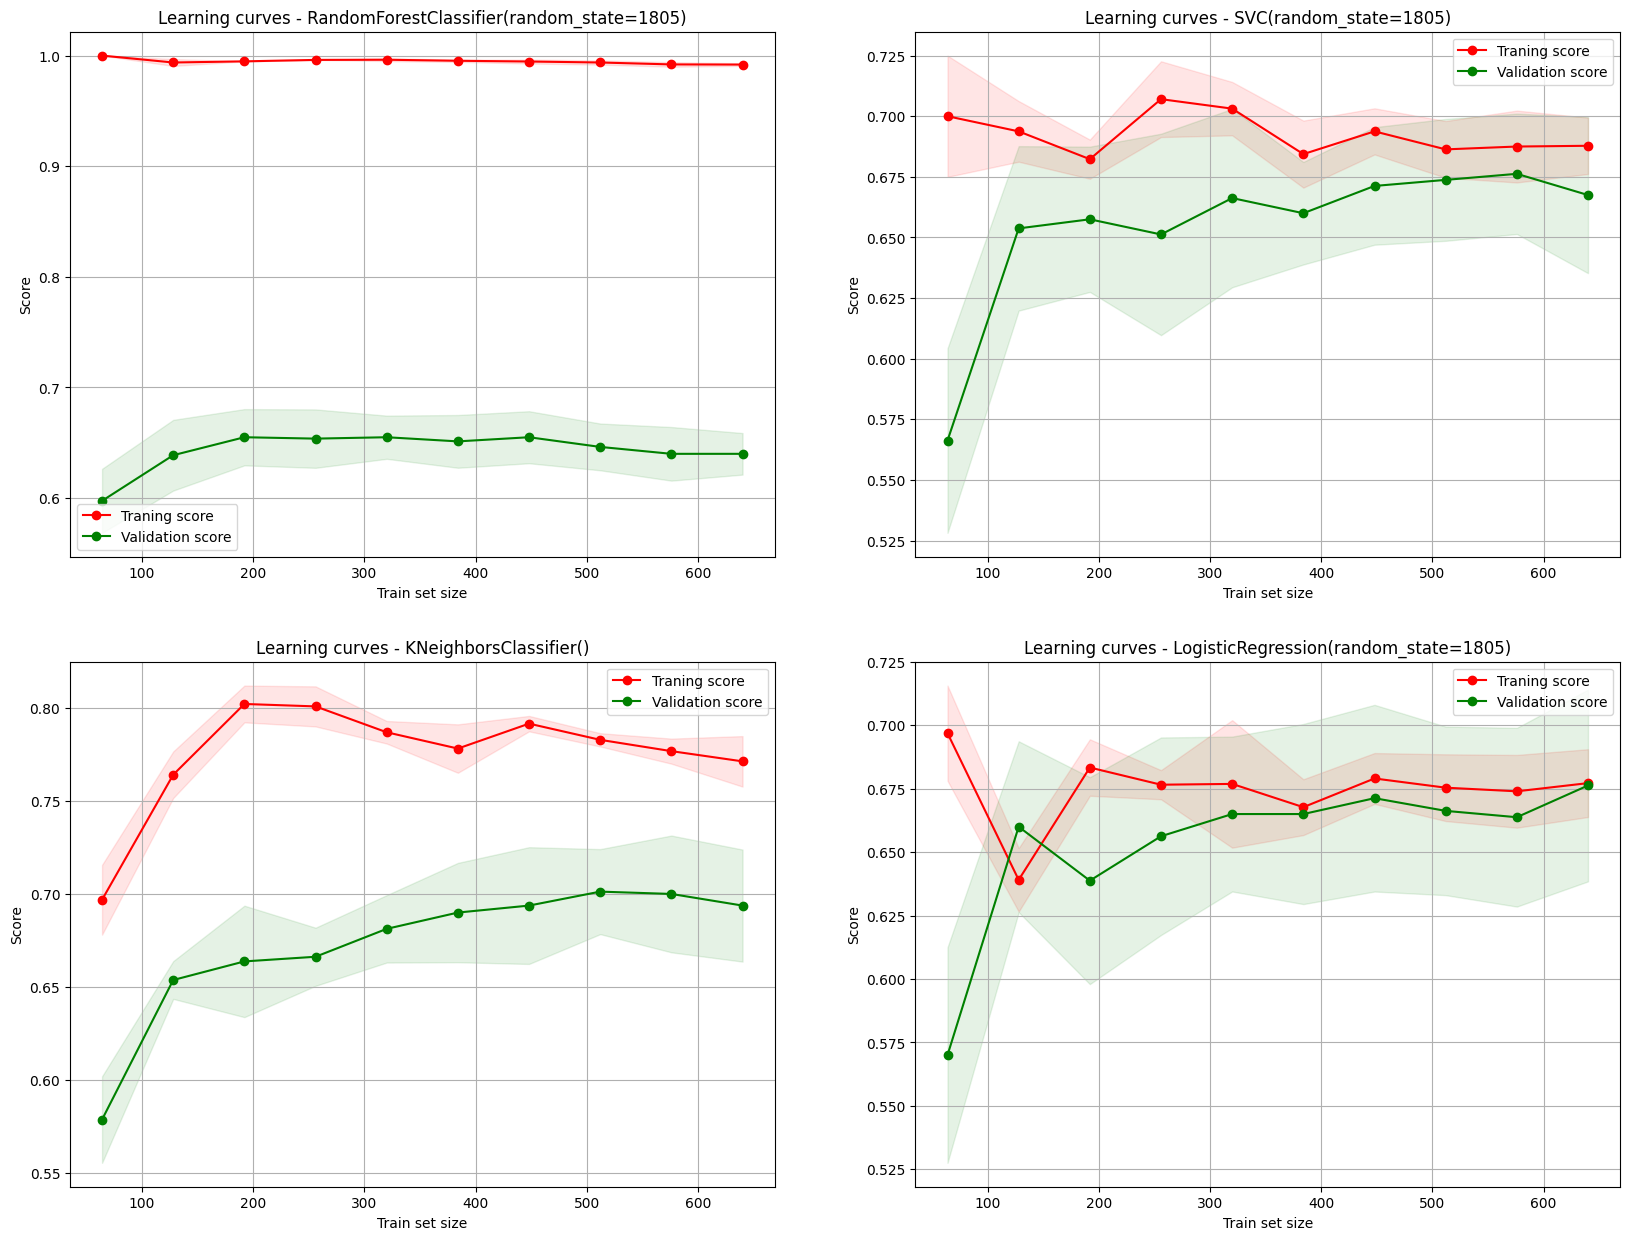

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.75,0.78,0.80,0.27,Underfitting :-0.04,not complexe enough
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.69,0.73,0.75,0.15,Underfitting :-0.06,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.77,0.75,0.76,0.20,Overfitting :0.03,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.68,0.72,0.74,0.12,Underfitting :-0.06,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,67,18
1.0,42,73


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.79      0.69        85
         1.0       0.80      0.63      0.71       115

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.72      0.70      0.70       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,58,27
1.0,35,80


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65        85
         1.0       0.75      0.70      0.72       115

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,68,17
1.0,46,69


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.80      0.68        85
         1.0       0.80      0.60      0.69       115

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.68       200
weighted avg       0.71      0.69      0.69       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,60,25
1.0,45,70


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.57      0.71      0.63        85
         1.0       0.74      0.61      0.67       115

    accuracy                           0.65       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.67      0.65      0.65       200

************************************



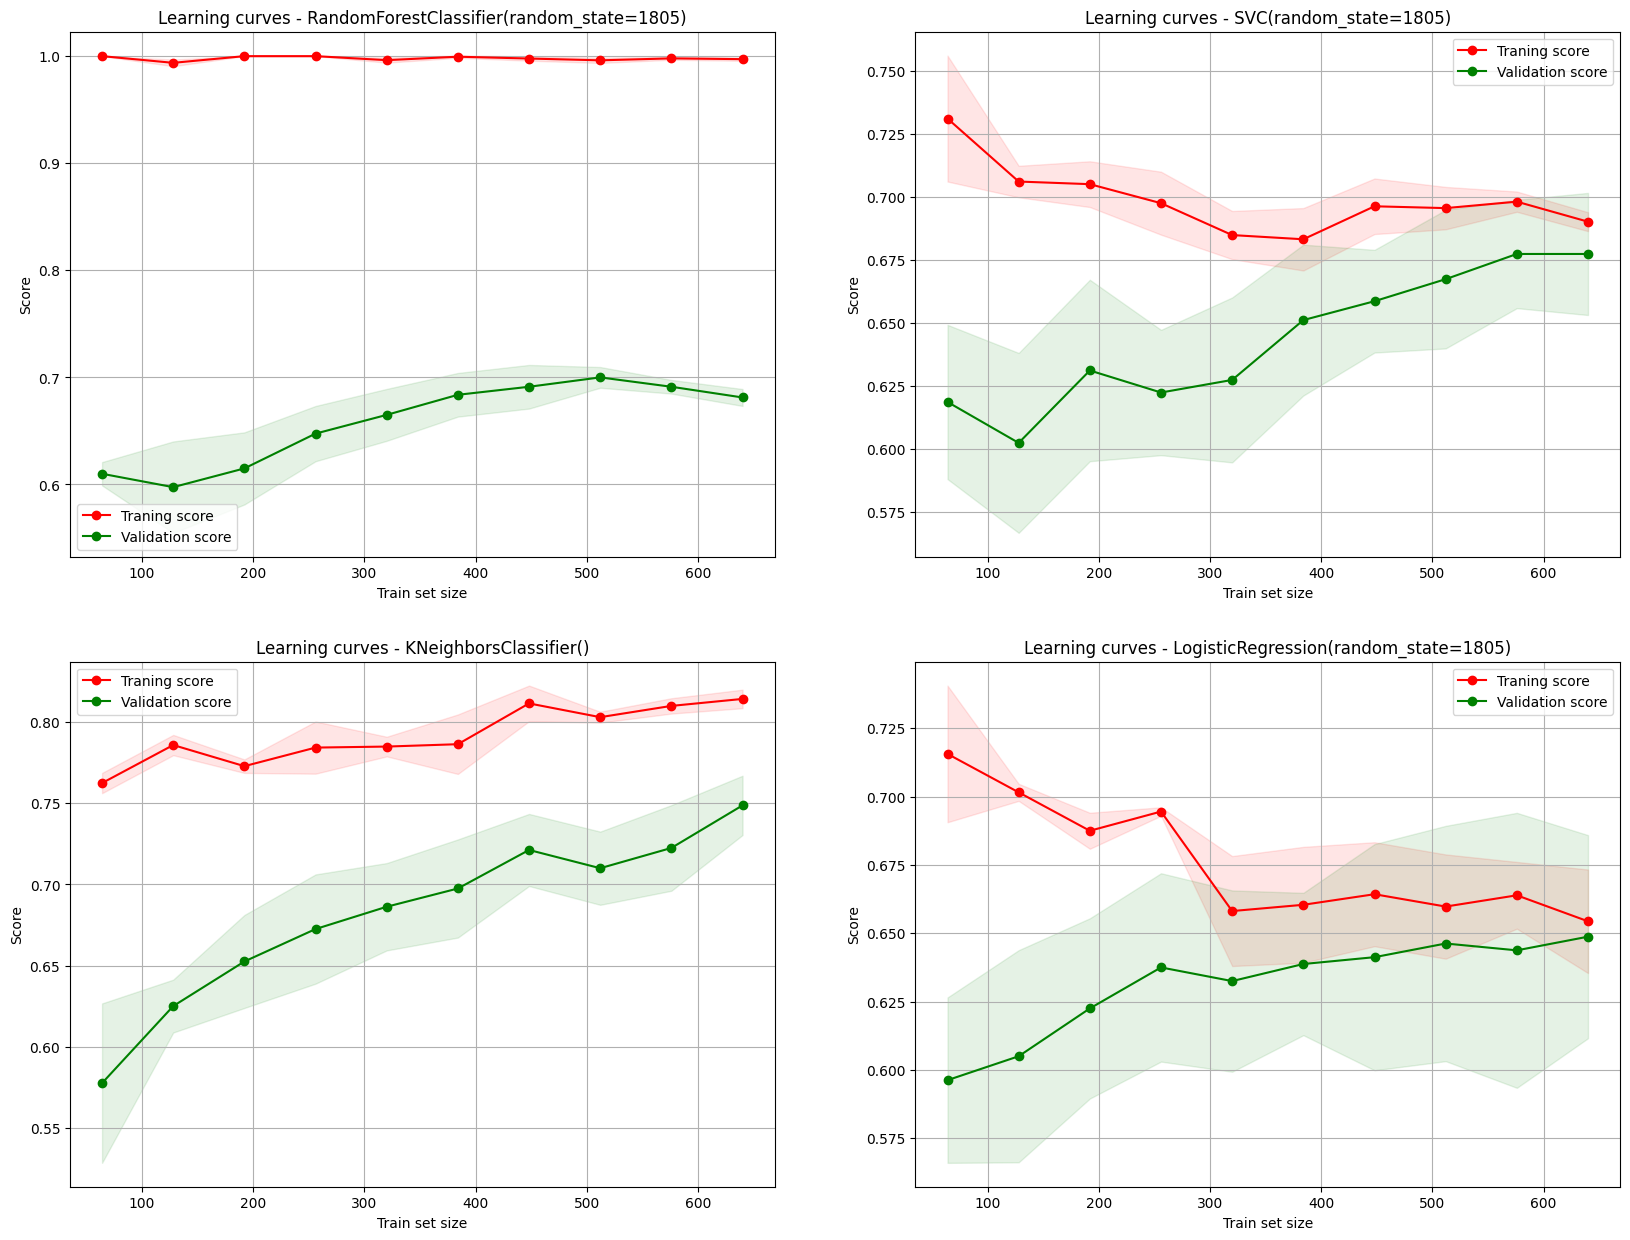

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.90,0.70,0.71,0.08,Overfitting :0.22,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.74,0.69,0.72,0.05,Overfitting :0.07,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.82,0.68,0.69,0.04,Overfitting :0.17,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.65,0.65,0.67,-0.04,Overfitting :0.0,not complexe enough


In [18]:
predict(X_lane_resampled,y_lane_resampled, method = 'classification')

### TAKE-OVER WITHOUT CHANGING LANE

In [19]:
X_no_lane_reduced, no_lane_pvalues = discriminate_target_association(X_no_lane,y_no_lane)

In [20]:
no_lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.003,0.809,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103,0.04,0.16,0.004,0.403,0.002,0.093,0.056,0.0,0.017,0.0,0.125,0.0,0.0,0.001,0.029,0.0,0.058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.495,0.002,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.003,0.809,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103,0.04,0.16,0.004,0.403,0.002,0.093,0.056,0.0,0.017,0.0,0.125,0.0,0.0,0.001,0.029,0.0,0.058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.495,0.002,0.0
TOQ (Coll a/o ILC),0.015,0.275,0.0,0.149,0.0,0.205,0.023,1.0,0.05,0.003,0.096,0.016,0.155,0.175,0.711,0.732,0.108,0.311,0.018,0.028,0.054,0.024,0.074,0.277,0.153,0.284,0.598,0.675,0.082,0.046,0.124,0.015,0.25,0.659,0.836,0.344,0.142,0.41,0.147,0.121,0.275,0.199,0.275,0.344,0.477,0.271,0.107,0.088,0.944,0.509,0.945,0.737,0.744,0.075,0.156,0.052,0.09,0.061,0.003,0.066,0.088,0.015,0.275,0.0,0.149,0.0,0.205,0.023,1.0,0.05,0.003,0.096,0.016,0.155,0.175,0.711,0.732,0.108,0.311,0.018,0.028,0.054,0.024,0.074,0.277,0.153,0.284,0.598,0.675,0.082,0.046,0.124,0.015,0.25,0.659,0.836,0.344,0.142,0.41,0.147,0.121,0.275,0.199,0.275,0.344,0.477,0.271,0.107,0.088,0.944,0.509,0.945,0.737,0.744,0.075,0.156,0.052,0.09,0.061,0.003,0.066,0.088


In [21]:
for key in y_no_lane:
    display(pd.DataFrame(no_lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o ILC)
ID Event,0.0
NDRT duration (s),0.0
NDRT duration (s),0.0
ID Event,0.0
FRONTAL THETA,0.003
FRONTAL THETA,0.003
THETA 4-8Hz,0.003
THETA 4-8Hz,0.003
Age,0.015
Cz ALPHA LOW 8-10Hz,0.015


In [22]:
X_no_lane_encoded = encoding_one_hot(X_no_lane_reduced)
list(X_no_lane_encoded.values())[0]

,Age,THETA 4-8Hz,ALPHA LOW 8-10Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA LOW 8-10Hz,Cz THETA 4-8Hz,Cz ALPHA LOW 8-10Hz,FRONTAL THETA,ID Event_1,ID Event_2,ID Event_3,ID Event_4,ID Event_5,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265,NDRT solicitation gaze_0,NDRT solicitation gaze_1,NDRT solicitation gaze_2
1,0.028571,0.053424,0.048826,0.087276,0.056423,0.063057,0.168055,0.059172,0.075578,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0.028571,0.045450,0.040451,0.082070,0.051063,0.056059,0.159324,0.050547,0.071032,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
8,0.028571,0.041768,0.040099,0.045853,0.017555,0.026649,0.134028,0.022930,0.061786,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
9,0.028571,0.047871,0.043573,0.053530,0.024259,0.031474,0.139385,0.027425,0.068577,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
15,0.171429,0.062123,0.058230,0.103104,0.074047,0.079690,0.174435,0.066914,0.090700,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
16,0.171429,0.064688,0.058865,0.107061,0.075437,0.080599,0.177195,0.065888,0.092963,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
17,0.171429,0.044679,0.033295,0.063587,0.027813,0.019084,0.138792,0.034604,0.059776,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
18,0.171429,0.049217,0.043386,0.057961,0.021821,0.026946,0.146426,0.034818,0.127847,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
24,0.016327,0.043293,0.062950,0.082404,0.053165,0.084910,0.157295,0.073174,0.070464,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
25,0.016327,0.038803,0.039771,0.074266,0.047942,0.058376,0.154369,0.059578,0.064122,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [23]:
for k in X_no_lane_encoded:
    X_no_lane_encoded[k] = X_no_lane_encoded[k].astype(int)

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,4,5
1.0,0,19


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,4,5
1.0,0,19


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,5,4
1.0,2,17


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.56      0.63         9
         1.0       0.81      0.89      0.85        19

    accuracy                           0.79        28
   macro avg       0.76      0.73      0.74        28
weighted avg       0.78      0.79      0.78        28

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,4,5
1.0,0,19


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

************************************



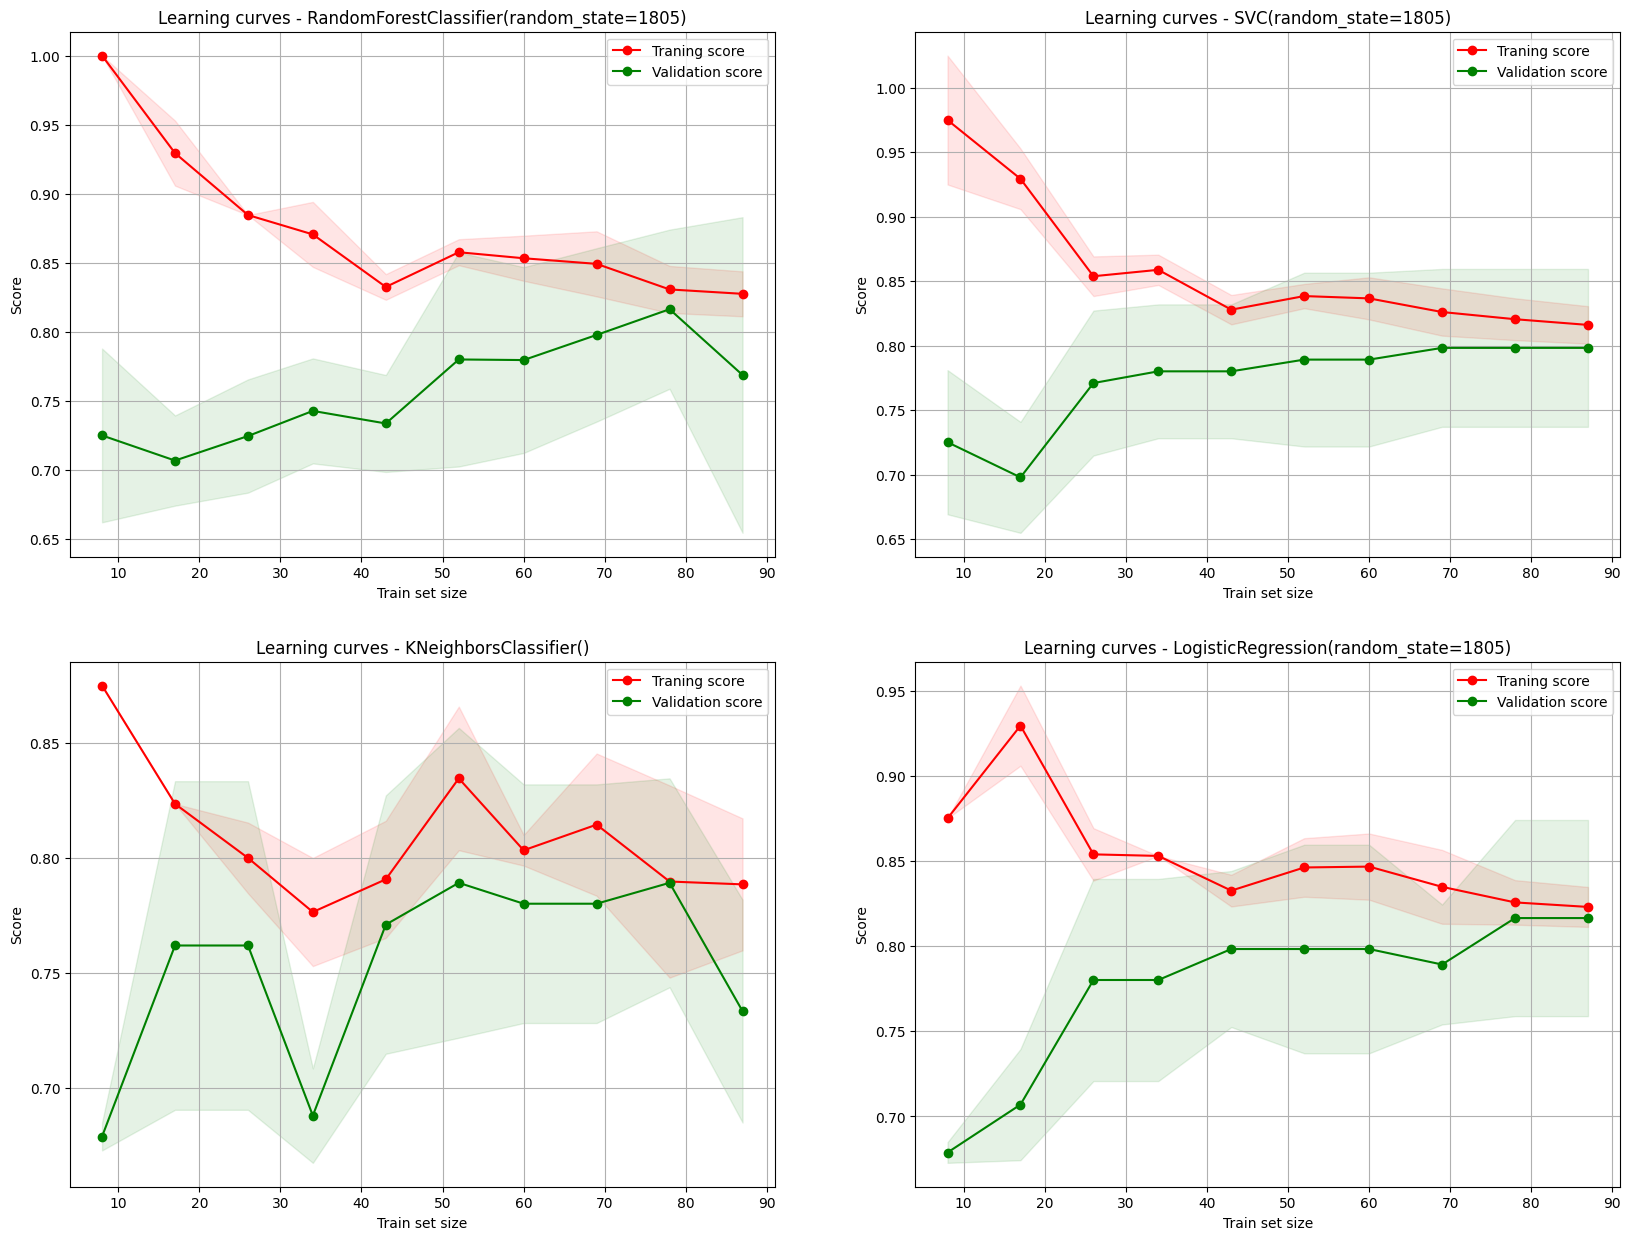

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.82,0.82,0.88,0.24,Overfitting :0.0,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.82,0.82,0.88,0.24,Overfitting :0.0,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.81,0.79,0.85,0.19,Overfitting :0.02,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.82,0.82,0.88,0.24,Overfitting :0.0,not complexe enough


In [24]:
predict(X_no_lane_encoded,y_no_lane, method = 'classification')

### Resampling dataset (create new samples)

In [25]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_encoded,y_no_lane,n_samples_created=200)

In [26]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_resampled,y_no_lane_resampled, _sampling_strategy='auto')

In [27]:
X_no_lane_resampled

{'TOQ (Coll a/o  ILC)':      Age  THETA 4-8Hz  ALPHA LOW 8-10Hz  Fz DELTA 1-4Hz  Fz THETA 4-8Hz  \
 0      0            0                 0               0               0   
 1      0            0                 0               0               0   
 2      0            0                 0               0               0   
 3      0            0                 0               0               0   
 4      0            0                 0               0               0   
 ..   ...          ...               ...             ...             ...   
 395    0            0                 0               0               0   
 396    0            0                 0               0               0   
 397    0            0                 0               0               0   
 398    0            0                 0               0               0   
 399    0            0                 0               0               0   
 
      Fz ALPHA LOW 8-10Hz  Cz THETA 4-8Hz  Cz ALPHA LOW 8-10Hz 

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,30,3
1.0,10,37


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82        33
         1.0       0.93      0.79      0.85        47

    accuracy                           0.84        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.84      0.84        80

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,30,3
1.0,10,37


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82        33
         1.0       0.93      0.79      0.85        47

    accuracy                           0.84        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.84      0.84        80

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,31,2
1.0,13,34


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.94      0.81        33
         1.0       0.94      0.72      0.82        47

    accuracy                           0.81        80
   macro avg       0.82      0.83      0.81        80
weighted avg       0.85      0.81      0.81        80

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,25,8
1.0,7,40


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        33
         1.0       0.83      0.85      0.84        47

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.81        80
weighted avg       0.81      0.81      0.81        80

************************************



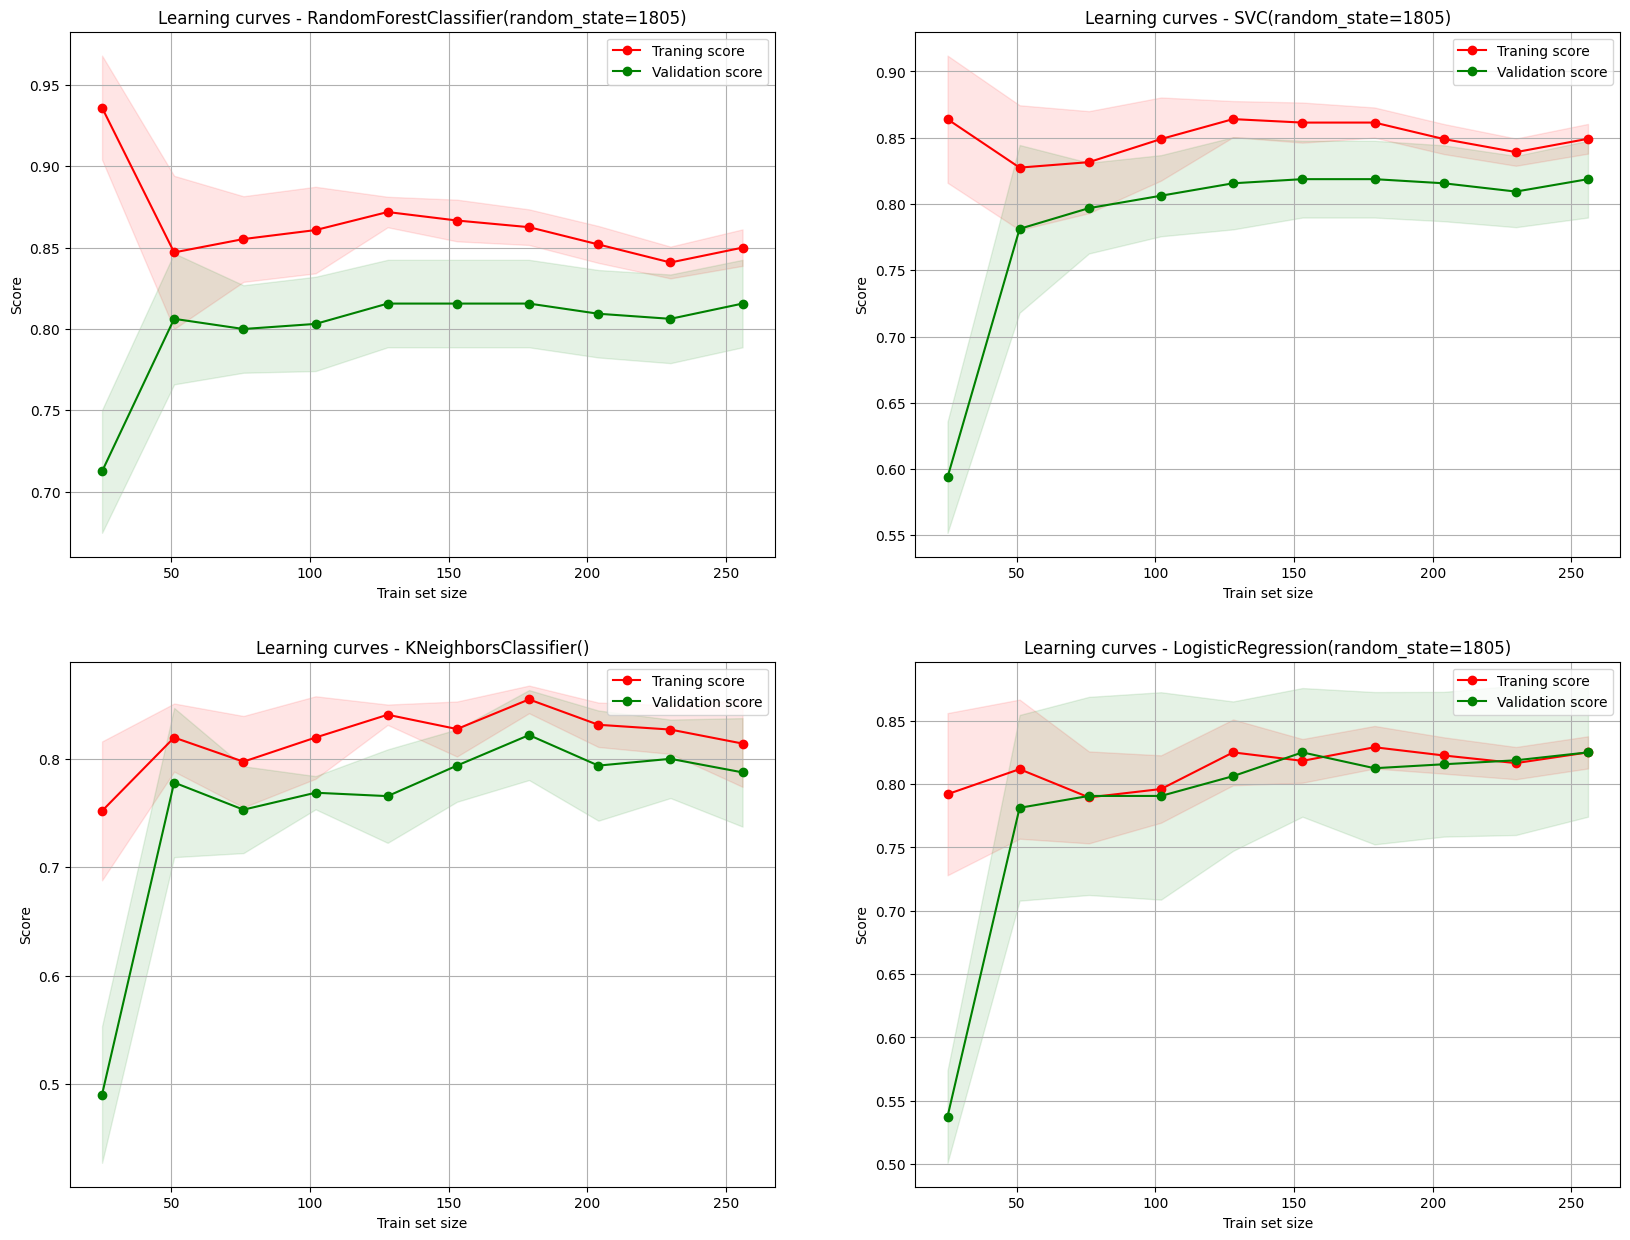

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.85,0.84,0.85,0.44,Overfitting :0.01,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.85,0.84,0.85,0.44,Overfitting :0.01,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.84,0.81,0.82,0.37,Overfitting :0.04,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.82,0.81,0.84,0.35,Overfitting :0.01,not complexe enough


In [28]:
predict(X_no_lane_resampled,y_no_lane_resampled, method = 'classification')

### TAKE-OVER TIME

In [29]:
X_TOT_reduced, TOT_pvalues = discriminate_target_association(X_TOT,y_TOT)

In [30]:
X_TOT_encoded = encoding_one_hot(X_TOT_reduced)
list(X_TOT_encoded.values())[0]

,TOTAL BAND 1-50Hz,Pz TOTAL BAND 1-50Hz,Pz THETA 4-8Hz,Pz BETA TOTAL 13-30Hz,Pz BETA HIGH 17-30Hz,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.0,0.034696,0.060751,0.039094,0.040501,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.044229,0.068606,0.052542,0.053409,0,0,0,0,0,0,0,1,0,0,0,0
2,0.0,0.037725,0.065437,0.040936,0.041954,0,0,0,1,0,0,0,0,0,0,0,0
3,0.0,1.000000,1.000000,1.000000,1.000000,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.091891,0.119323,0.098708,0.099346,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.0,0.025217,0.047499,0.019671,0.023286,0,0,1,0,0,0,0,0,0,0,0,0
353,0.0,0.019468,0.049443,0.025243,0.025746,0,0,0,0,1,0,0,0,0,0,0,0
354,0.0,0.024144,0.037993,0.029569,0.035293,0,0,0,0,0,0,0,0,0,0,0,1
355,0.0,0.026462,0.047885,0.024959,0.027920,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
list(X_TOT_reduced.values())[0]

,TOTAL BAND 1-50Hz,Pz TOTAL BAND 1-50Hz,Pz THETA 4-8Hz,Pz BETA TOTAL 13-30Hz,Pz BETA HIGH 17-30Hz,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.0,0.034696,0.060751,0.039094,0.040501,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.044229,0.068606,0.052542,0.053409,0,0,0,0,0,0,0,1,0,0,0,0
2,0.0,0.037725,0.065437,0.040936,0.041954,0,0,0,1,0,0,0,0,0,0,0,0
3,0.0,1.000000,1.000000,1.000000,1.000000,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.091891,0.119323,0.098708,0.099346,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.0,0.025217,0.047499,0.019671,0.023286,0,0,1,0,0,0,0,0,0,0,0,0
353,0.0,0.019468,0.049443,0.025243,0.025746,0,0,0,0,1,0,0,0,0,0,0,0
354,0.0,0.024144,0.037993,0.029569,0.035293,0,0,0,0,0,0,0,0,0,0,0,1
355,0.0,0.026462,0.047885,0.024959,0.027920,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
TOT_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOT (s),0.121,0.709,0.053,0.259,0.033,0.086,0.286,NaN,0.094,0.311,0.832,0.955,0.691,0.924,0.572,0.18,0.54,0.295,0.055,0.11,0.394,0.298,0.472,0.433,0.286,0.503,0.421,0.562,0.076,0.369,0.905,0.714,0.944,0.85,0.592,0.935,0.562,0.0,0.111,0.047,0.333,0.238,0.387,0.008,0.111,0.007,0.111,0.521,0.669,0.795,0.338,0.401,0.303,0.255,0.432,0.218,0.41,0.863,0.124,0.965,0.139,0.121,0.709,0.053,0.259,0.033,0.086,0.286,NaN,0.094,0.311,0.832,0.955,0.691,0.924,0.572,0.18,0.54,0.295,0.055,0.11,0.394,0.298,0.472,0.433,0.286,0.503,0.421,0.562,0.076,0.369,0.905,0.714,0.944,0.85,0.592,0.935,0.562,0.0,0.111,0.047,0.333,0.238,0.387,0.008,0.111,0.007,0.111,0.521,0.669,0.795,0.338,0.401,0.303,0.255,0.432,0.218,0.41,0.863,0.124,0.965,0.139


In [33]:
for key in y_TOT:
    display(pd.DataFrame(TOT_pvalues.T[key].sort_values()[:10]))

,TOT (s)
Pz TOTAL BAND 1-50Hz,0.0
Pz TOTAL BAND 1-50Hz,0.0
Pz BETA HIGH 17-30Hz,0.007
Pz BETA HIGH 17-30Hz,0.007
Pz BETA TOTAL 13-30Hz,0.008
Pz BETA TOTAL 13-30Hz,0.008
NDRT duration (s),0.033
NDRT duration (s),0.033
Pz THETA 4-8Hz,0.047
Pz THETA 4-8Hz,0.047


TOT (s)



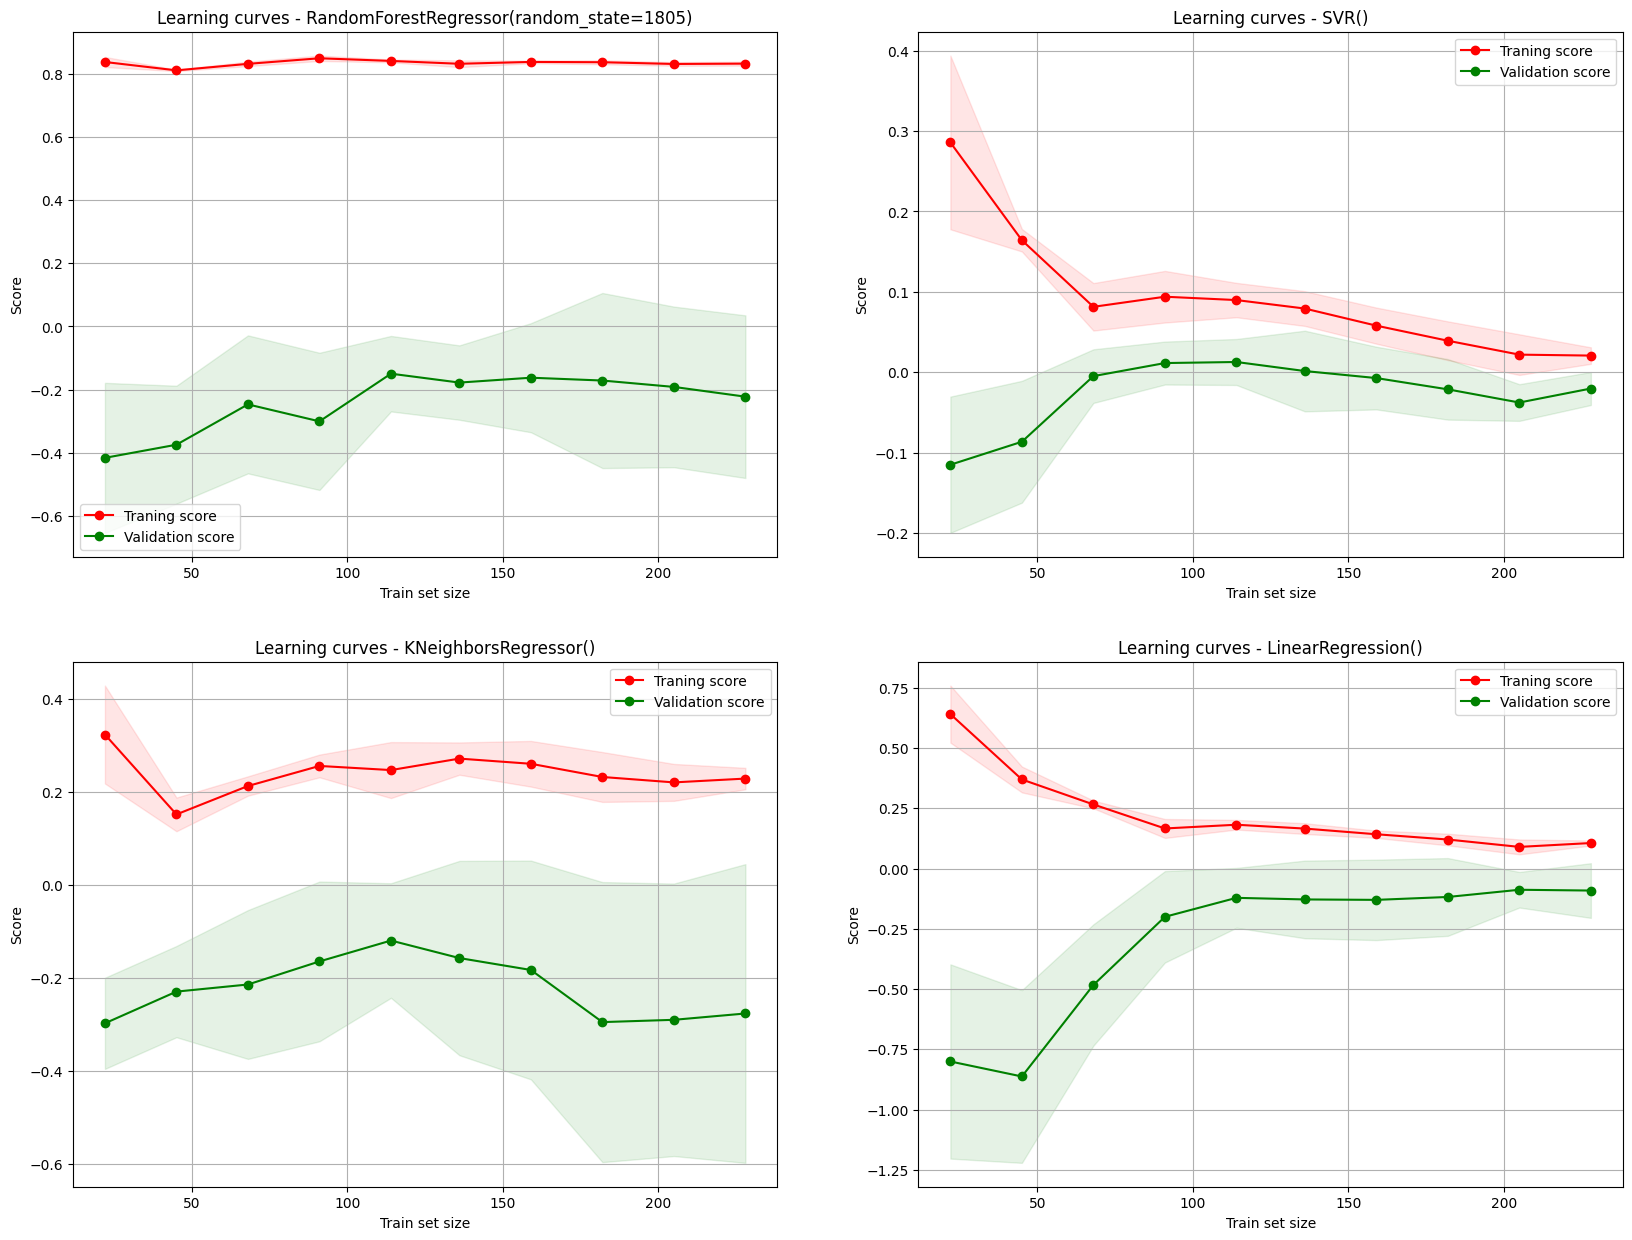

,target,model,hyperparameters,grid_score_train,grid_score_test,mse,mae,rmse,mean_error (s),fitting,complexity
0,TOT (s),Random Forest,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.36,-0.06,0.061,0.154,0.248,0.154,Overfitting :1.17,too much complex
1,TOT (s),SVR,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}",0.07,-0.05,0.061,0.142,0.246,0.142,Overfitting :1.71,too much complex
2,TOT (s),KNN Regressor,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.17,-0.21,0.070,0.174,0.265,0.175,Overfitting :2.24,too much complex
3,TOT (s),Linear Regression,{},0.09,-0.21,0.070,0.174,0.265,0.174,Overfitting :3.33,too much complex


In [34]:
predict(X_TOT_encoded,y_TOT, method = 'regression')